In [2]:
# coding:utf-8
import math
import numpy
import jieba
import jieba.analyse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cPickle as pkl
import re
import os
import tqdm
import codecs
import fasttext
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer  
%matplotlib inline
print "done"

done


# 1.数据处理

## 加载分词

In [3]:
# 停用词加载
import codecs
stopwords = []
with codecs.open('./stopwords_full.txt', 'r', 'utf-8') as f:
    stopwords = [i.rstrip() for i in f.readlines()]
    
# 新加停用词，使用tf-idf筛选
# with codecs.open('./stopwords_new.txt', 'r', 'utf-8') as f:
#     stopwords += [i.rstrip() for i in f.readlines()]
stopwords.append(' ')
stopwords.append(u'\x1d')
print('停用词个数：{}'.format(len(stopwords)))

stopwords_dict = dict(zip(stopwords, range(len(stopwords))))

# 结巴字典加载
jieba.load_userdict('./medical_jieba.dic')
print "done"

Building prefix dict from the default dictionary ...
Loading model from cache /mnt/d/work/appointment/appointment-code/jieba.cache


停用词个数：1896


Loading model cost 0.493 seconds.
Prefix dict has been built succesfully.


done


## 处理数据

In [4]:
# 读取数据，分词，储存
des_list = list()

with codecs.open('../data/traindata_all_processed.txt', 'rb', 'utf-8') as f:
    contents = f.readlines()
for line in tqdm.tqdm(contents):
    line_s = line.split('\t')
    if len(line_s) < 2:
        continue
    des = line_s[0]
    depart = line_s[1].strip()
    
    des_jieba = jieba.cut_for_search(des)
    des_final = u' '.join([j for j in des_jieba if (not stopwords_dict.has_key(j)) 
                              and (re.search(pattern=u'[\u4e00-\u9fa5]+', string=j))])
    # 分词后，疾病描述不能为空
    if not des_final=='':
        des_list.append((depart, des_final))
        
# 存储
with codecs.open('../data/search_appointments_split_raw.txt', 'wb', 'utf-8') as f:
    for (label, des) in des_list:
        w = u'{}\t{}\n'.format(label, des)
        f.write(w)
print ("分词数据保存成功")

100%|██████████| 246616/246616 [01:49<00:00, 2255.55it/s]


分词数据保存成功


In [5]:
# # 统计样本长度
# len_dict = dict()
# for label, des in des_list:
#     length = len(des.split(" "))
#     if len_dict.has_key(length):
#         len_dict[length] += 1
#     else:
#         len_dict[length] = 1
# for key in len_dict.keys():
#     print key, len_dict[key]

## 统计TF-IDF

In [6]:
# from collections import defaultdict

# alldata = defaultdict(list)

# with open("../data/search_appointments_split_raw.txt", 'rb') as f:
#     for aline in f.readlines():
#         lines = aline.split("\t")
#         alldata[lines[0]] += lines[1].split(' ')
        
# for key in alldata.keys():
#     alldata[key] = " ".join(alldata[key])
# vectorizer = CountVectorizer()
# transformer = TfidfTransformer()
# tfidf = transformer.fit_transform(vectorizer.fit_transform(alldata.values()))

# word = vectorizer.get_feature_names()
# print "done"

In [7]:
# threshhold = 400
# topDict = defaultdict(list)

# for i, key in enumerate(alldata.keys()):
#     # 筛选tf-idf高的词
#     sortIndex = (-tfidf[i].toarray()).argsort()[0]
#     for j, index in enumerate(sortIndex):
#         topDict[key].append(word[index])
#         if j == threshhold-1:
#             break
# # 打印看看
# # for key in topDict.keys():
# #     print "*"*40
# #     print key
# #     for word in topDict[key]:
# #         print word
# wordset = set([j for i in topDict.values() for j in i])
# count = dict()
# for aword in wordset:
#     count[aword] = 0
# for key, wordlist in topDict.items():
#     for aword in wordlist:
#         count[aword] += 1
# res = sorted(count.iteritems(), key=lambda item:item[1], reverse = True)
# for (a, b) in res:
#     print a
#     if b<30:
#         break

In [8]:
# cut_des_list = list()
# threshhold = 30
# with codecs.open('../data/search_appointments_split_raw.txt', 'rb', 'utf-8') as f:
#     for aline in f.readlines():
#         line = aline.split('\t')
#         depart = line[0]
#         des = line[1].split(' ')
#         length = len(des)
#         if length >= threshhold:
#             rem = length % 30
            

## 处理数据（替换相似词）

In [8]:
# sub_dict = dict()
# new_data = list()
# with codecs.open('../word2vec/sub_dict.txt', 'rb', 'utf-8') as f:
#     for line in f.readlines():
#         line_s = line.split('\t')
#         sub_word = line_s[0]
#         sub_set = set(line_s[1].split(" "))
#         sub_dict[sub_word] = sub_set

# with codecs.open('../data/search_appointments_split_raw.txt', 'rb', 'utf-8') as f:
#         contents = f.readlines()
#         for line in tqdm.tqdm(contents):
#             line_s = line.split('\t')
#             department = line_s[0]
#             description = line_s[1].split(" ")
#             new_description = list()
#             for aword in description:
#                 aword = aword.strip()
#                 found = False
#                 for sub_word in sub_dict.keys():
#                     if aword in sub_dict[sub_word]:
#                         new_description.append(sub_word)
#                         found = True
#                         break
#                 if not found:
#                     new_description.append(aword)
#             new_data.append((department, new_description))

#             # 储存        
# with codecs.open('../data/search_appointments_split.txt', 'wb', 'utf-8') as f:
#     for (label, des) in new_data:
#         des = [i.strip() for i in des]
#         w = u'{}\t{}\n'.format(label, " ".join(des))
#         f.write(w)
# print "储存成功"

100%|██████████| 246206/246206 [33:05<00:00, 124.00it/s]


储存成功


# 2.筛选科室

## 二级科室

In [9]:
# 创建目录
if not os.path.exists('../data/depart'):
    os.makedirs('../data/depart')
if not os.path.exists('../data/depart_data'):
    os.makedirs('../data/depart_data')
if not os.path.exists('../data/model'):
    os.makedirs('../data/model')

In [10]:
# 二级科室划分训练集与数据集
def erji_department_s(deName):
    # 数据处理 分层 train/test
    SPLIT_RATE = 0.8
    label_index_list = list()
    with codecs.open('../data/depart_data/search_appointments_select_split_{}.txt'.format(deName), 'rb', 'utf-8') as f:
        contents = f.readlines()
        descrip_data = contents
        for line in contents:
            line_s = line.split('\t')
            label_index_list.append(line_s[0].encode('utf-8'))

    label_dict = dict()
    for index in range(len(label_index_list)):
        label = label_index_list[index]

        if label_dict.has_key(label):
            label_dict[label].append(index)
        else:
            label_dict.setdefault(label, [index])
    train_list = list()
    test_list = list()
    train_num_dict = dict()
    # 设置是否过采样
    over_sampling = False

    for index in range(len(label_dict.keys())):
        label_aim = '__label__'+str(index)

        llist = label_dict[label_aim]

        train_num_dict[label_aim] = int(SPLIT_RATE*len(llist))

    max_samp_num = max(train_num_dict.values())   

    print('二级科目数：{}'.format(len(label_dict.keys())))
    for index in range(len(label_dict.keys())):
        label_aim = '__label__'+str(index)
        llist = label_dict[label_aim]
        np.random.shuffle(llist)

        train_slen = train_num_dict[label_aim]
        for sindex in llist[:train_slen]:
            train_list.append(descrip_data[sindex])

        if over_sampling:
            over_count_need = (max_samp_num/train_slen-1)*train_slen
            over_count = 0
            over_indexs = np.random.randint(0, train_slen, over_count_need)
            for over_index in over_indexs:
                sindex = llist[over_index]
                train_list.append(descrip_data[sindex])

        for sindex in llist[train_slen:]:
            test_list.append(descrip_data[sindex])

    np.random.shuffle(train_list)
    np.random.shuffle(test_list)

    # 存储
    with codecs.open('../data/depart_data/search_appointments_split_train1_{}.txt'.format(deName), 'wb', 'utf-8') as f:
        for line in train_list:
            f.write(line)

    with codecs.open('../data/depart_data/search_appointments_split_test1_{}.txt'.format(deName), 'wb', 'utf-8') as f:
        for line in test_list:
            f.write(line)
            
    # 训练集字典生成，以及测试集合词筛选
    # 到时候做 低频词筛选
    with open('../data/depart_data/search_appointments_split_train1_{}.txt'.format(deName), 'rb') as f:
        train_contents = f.read()
        
    # 对训练集统计词
    train_countv = CountVectorizer()
    result_train_countv = train_countv.fit_transform([train_contents])

    train_vocabulary = train_countv.vocabulary_
    print('训练集词语数：{}'.format(len(train_countv.vocabulary_)))

    LESS_FRE_WORD = 0
    train_dictionary = list()

    #低频词筛选
    for word, value in train_vocabulary.iteritems():
        if result_train_countv[0, value] > LESS_FRE_WORD:
            train_dictionary.append(word.encode('utf-8'))

    print('低频词筛选后词语数：{}'.format(len(train_dictionary)))
    with codecs.open('../data/depart_data/word_dictionary_{}.txt'.format(deName), 'wb', 'utf-8') as f:
        for line in train_dictionary:
            f.write(line.decode('utf-8')+'\n')
    train_dictionary = dict(zip(train_dictionary, range(len(train_dictionary))))


    with open('../data/depart_data/search_appointments_split_test1_{}.txt'.format(deName), 'rb') as f:
        test_contents = f.read()
        
    # 对测试集统计词
    test_countv = CountVectorizer()
    result_test_countv = test_countv.fit_transform([test_contents])

    test_vocabulary = test_countv.vocabulary_
    print('测试集词语数：{}'.format(len(test_countv.vocabulary_))) 

    # 通过字典，分别对train数据集和test数据集筛选
    with open('../data/depart_data/search_appointments_split_train1_{}.txt'.format(deName), 'rb') as f:
        train_contents = f.readlines()
        print('筛选前训练集大小：{}'.format(len(train_contents)))
    with open('../data/depart_data/search_appointments_split_test1_{}.txt'.format(deName), 'rb') as f:
        test_contents = f.readlines()
        print('筛选前测试集大小：{}'.format(len(test_contents)))

    train_list = list()
    test_list = list()
    
    # 训练集
    for line in train_contents:
        line_s = line.split('\t')
        label = line_s[0]
        words = [i.strip() for i in line_s[1].split(' ')]
        words = [i for i in words if train_dictionary.has_key(i)]
        if len(words) != 0:
            train_list.append('{}\t{}'.format(label, ' '.join(words)))

    # 测试集
    for line in test_contents:
        line_s = line.split('\t')
        label = line_s[0]
        words = [i.strip() for i in line_s[1].split(' ')]
        words = [i for i in words if train_dictionary.has_key(i)]
        if len(words) != 0:
            test_list.append('{}\t{}'.format(label, ' '.join(words)))

    print('筛选后训练集大小：{}'.format(len(train_list)))
    print('筛选后测试集大小：{}'.format(len(test_list)))

    # 存储
    with codecs.open('../data/depart_data/search_appointments_split_train_{}.txt'.format(deName), 'wb', 'utf-8') as f:
        for line in train_list:
            f.write(line.decode('utf-8')+'\n')

    with codecs.open('../data/depart_data/search_appointments_split_test_{}.txt'.format(deName), 'wb', 'utf-8') as f:
        for line in test_list:
            f.write(line.decode('utf-8')+'\n')

In [11]:
# 二级科室模型训练
def fast_text_model(deName):           
    # set params
    with open('../data/depart_data/search_appointments_split_train_{}.txt'.format(deName), 'rb') as f:
        content = f.readlines()
        count = len(content)
    
    lr = 0.3
    epoch = int(100*math.sqrt(200000/count))
    bucket = int(math.sqrt((float(count)/200000))*2000000)
    print deName, count, lr, epoch, bucket
    keshi = deName
    input_file = '../data/depart_data/search_appointments_split_train_{}.txt'.format(keshi)
    output = '../data/model/app_model_{}'.format(keshi)
    dim=50
    loss= 'hs'
    lr_update_rate = 98
    ws = 5
    min_count=2
    neg = 2
    word_ngrams= 5
    thread=5
    silent=1
    label_prefix='__label__'

    # Train the classifier
    classifier_app = fasttext.supervised(input_file, output, dim=dim, lr=lr, epoch=epoch,
                                         lr_update_rate = lr_update_rate, loss = loss, neg = neg,
                                         min_count=min_count, word_ngrams=word_ngrams, bucket=bucket,
                                         thread=thread, silent=silent, label_prefix=label_prefix, ws=ws)


    result = classifier_app.test(input_file)
    print('Train:')
    print('P@1:', result.precision)
    print('R@1:', result.recall)
    print('Number of examples:', result.nexamples)

    test_result = classifier_app.test('../data/depart_data/search_appointments_split_test_{}.txt'.format(keshi), 1)
    print('Test:')
    print('P@1:', test_result.precision)
    print('R@1:', test_result.recall)
    print('Number of examples:', test_result.nexamples)

    labels_right = []
    texts = []
    with open('../data/depart_data/search_appointments_split_test_{}.txt'.format(keshi)) as fr:
        lines = fr.readlines()
    for line in lines:
        labels_right.append(line.split("\t")[0].rstrip().replace("__label__",""))
        texts.append(line.split("\t")[1].decode("utf-8"))
    #     print labels
    #     print texts
    #     break
    labels_predict = [e[0] for e in classifier_app.predict(texts)] #预测输出结果为二维形式
    # print labels_predict

    text_labels = list(set(labels_right))
    text_predict_labels = list(set(labels_predict))
    # print text_predict_labels
    # print text_labels

    A = dict.fromkeys(text_labels,0)  #预测正确的各个类的数目
    B = dict.fromkeys(text_labels,0)  #测试数据集中各个类的数目
    C = dict.fromkeys(text_labels,0)  #预测结果中各个类的数目
    for i in range(0,len(labels_right)):
        B[labels_right[i]] += 1
        C[labels_predict[i]] += 1
        if labels_right[i] == labels_predict[i]:
            A[labels_right[i]] += 1

    # print A 
    # print B
    # print C
    select_department_dict = pkl.load(open('../data/depart/department_{}.pkl'.format(keshi), 'rb'))
    select_de_tup = select_department_dict.items()
    new_dict = dict(zip([str(x[1]) for x in select_de_tup], [x[0] for x in select_de_tup]))

    rlist = list()
    #计算准确率，召回率，F值
    for key in B:
        if int(B[key]) == 0:
            r = 0
        else:
            r = round(A[key] / float(B[key]), 3)
        if int(C[key]) == 0:
            p = 0
        else:
            p = round(A[key] / float(C[key]), 3)
        if (p+r) == 0:
            f1 = 0
        else:
            f1 = round(p * r * 2 / (p + r), 3)
        rlist.append([key,new_dict.get(key),r,p,f1,int(B[key])])
#         print "%s:%s\tp:%f\tr:%f\tf:%f\t" % (key,new_dict.get(key),r,p,f1)
    rdataf = pd.DataFrame(rlist, columns=['Key', 'Department', 'Recall', 'Precision', 'F1', 'Support'])
    print(rdataf)

In [12]:
# 数据处理，根据一级科目筛选，并保存label对应关系
with codecs.open('../data/department_seg.txt', 'rb') as f:
    contents = f.readlines()
for line in contents:
    line_s = line.split('：')
    fdepart = line_s[0]
    sdepart_list = line_s[1].split('，')
    select_department = [i.strip() for i in sdepart_list]
    fdepart_name = line_s[2].strip()
    
    des_list = list()
    select_depart_dict = dict()

    with codecs.open('../data/search_appointments_split.txt', 'rb', 'utf-8') as f:
        contents = f.readlines()
        for line in contents:
            line_s = line.split('\t')
            department = line_s[0].encode('utf-8')
            
            if department in select_department:
                if not select_depart_dict.has_key(department):
                    select_depart_dict[department] = len(select_depart_dict.keys())
                des_list.append(('__label__{}'.format(select_depart_dict[department]), u''.join(line_s[1:])))

    #保存科室与label对应关系
    if len(select_depart_dict.keys()) == 0:
        continue
        
    store_tup = sorted(select_depart_dict.items(), key=lambda item:item[1])
    with codecs.open('../data/depart/department_{}.txt'.format(fdepart_name), 'wb','utf-8') as f:
        for depart, index in store_tup:
            f.write(('{}\t{}\n'.format(depart, index)).decode('utf-8'))

    pkl.dump(select_depart_dict, open('../data/depart/department_{}.pkl'.format(fdepart_name), 'wb'))

    # 存储
    with codecs.open('../data/depart_data/search_appointments_select_split_{}.txt'.format(fdepart_name), 'w', 'utf-8') as f:
        for (label, des) in des_list:
            f.write(u'{}\t{}'.format(label, des))  
    print fdepart, "done"
print "done"

内科 done
儿科 done
外科 done
妇产科 done
肿瘤科 done
五官科 done
皮肤性病科 done
骨科 done
血液科 done
感染科 done
心理健康 done
康复科 done
中医科 done
男科 done
疼痛科 done
风湿免疫科 done
急诊科 done
done


In [13]:
# 划分训练集测试集
with codecs.open('../data/department_seg.txt', 'rb') as f:
    contents = f.readlines()
    for line in contents:
        fdepart_name = line.split('：')[2].strip()

        print('*'*40)
        print(line.split('：')[0].strip())
        erji_department_s(fdepart_name)
print "done"

****************************************
内科
二级科目数：7
训练集词语数：39651
低频词筛选后词语数：39651
测试集词语数：18840
筛选前训练集大小：44351
筛选前测试集大小：11094
筛选后训练集大小：44317
筛选后测试集大小：11088
****************************************
儿科
二级科目数：2
训练集词语数：14786
低频词筛选后词语数：14786
测试集词语数：6996
筛选前训练集大小：10005
筛选前测试集大小：2503
筛选后训练集大小：9997
筛选后测试集大小：2502
****************************************
外科
二级科目数：8
训练集词语数：34869
低频词筛选后词语数：34869
测试集词语数：16690
筛选前训练集大小：40768
筛选前测试集大小：10196
筛选后训练集大小：40729
筛选后测试集大小：10187
****************************************
妇产科
二级科目数：2
训练集词语数：16216
低频词筛选后词语数：16216
测试集词语数：7626
筛选前训练集大小：14383
筛选前测试集大小：3597
筛选后训练集大小：14378
筛选后测试集大小：3595
****************************************
肿瘤科
二级科目数：1
训练集词语数：11562
低频词筛选后词语数：11562
测试集词语数：5260
筛选前训练集大小：5662
筛选前测试集大小：1416
筛选后训练集大小：5660
筛选后测试集大小：1416
****************************************
五官科
二级科目数：3
训练集词语数：23855
低频词筛选后词语数：23855
测试集词语数：11039
筛选前训练集大小：21572
筛选前测试集大小：5396
筛选后训练集大小：21561
筛选后测试集大小：5395
****************************************
皮肤性病科
二级科目数：2
训练集词语数：15504
低频词筛选后词语数：15504
测试集

In [14]:
# 二级模型训练与测试
with codecs.open('../data/department_seg.txt', 'rb') as f:
    contents = f.readlines()
for line in contents:
    line_s = line.split('：')
    fdepart = line_s[0]
    sdepart_list = line_s[1].split('，')
    
    # 二级科目只有一个，无需分类
    if len(sdepart_list)==1:
        print fdepart, "pass"
        continue
        
    fdepart_name = line_s[2].strip()
    print('*'*40)
    print(fdepart)
    fast_text_model(fdepart_name)
    print('\n')
print "done"

****************************************
内科
neike 44317 0.3 200 941456
Train:
('P@1:', 0.998691247151206)
('R@1:', 0.998691247151206)
('Number of examples:', 44317)
Test:
('P@1:', 0.8206168831168831)
('R@1:', 0.8206168831168831)
('Number of examples:', 11088)
  Key Department  Recall  Precision     F1  Support
0   1       消化内科   0.885      0.840  0.862     1798
1   0       内分泌科   0.851      0.827  0.839     1756
2   3       普通内科   0.491      0.648  0.559     1209
3   2        肾内科   0.855      0.913  0.883     1191
4   5       呼吸内科   0.883      0.852  0.867     1800
5   4       神经内科   0.859      0.777  0.816     1799
6   6      心血管内科   0.825      0.843  0.834     1535


****************************************
儿科
erke 9997 0.3 447 447146
Train:
('P@1:', 0.9996999099729919)
('R@1:', 0.9996999099729919)
('Number of examples:', 9997)
Test:
('P@1:', 0.916466826538769)
('R@1:', 0.916466826538769)
('Number of examples:', 2502)
  Key Department  Recall  Precision     F1  Support
0   1         

# 一级科室

In [15]:
# 生成一级科目label对应文件
# import json
first_secondDepart = dict()
second_firstDepart = dict()

with codecs.open('../data/department_seg.txt', 'rb') as f:
    contents = f.readlines()
    for line in contents:
        line_s = line.split('：')
        fdepart = line_s[0]
        sdepart_list = line_s[1].split('，')
        sdepart_list = [i.strip() for i in sdepart_list]
        first_secondDepart.setdefault(fdepart, sdepart_list)
        for sdepart in sdepart_list:
            second_firstDepart.setdefault(sdepart, fdepart)

#print json.dumps(first_secondDepart, encoding="UTF-8", ensure_ascii=False)
#print json.dumps(second_firstDepart, encoding="UTF-8", ensure_ascii=False)
            
select_department_zip = zip(first_secondDepart.keys(), range(len(first_secondDepart.keys())))

with codecs.open('../data/department.txt', 'wb','utf-8') as f:
    for (d, i) in select_department_zip:
        f.write(('{}\t{}\n'.format(d, i)).decode('utf-8'))

select_department_dict = dict(select_department_zip)
pkl.dump(select_department_dict, open('../data/department.pkl', 'wb'))

print "done"

done


In [16]:
# # 统计一下数据中病人科室分布情况

# WORDS_COUNT = 700
# department_counts = appointment_data.department_std.value_counts()
# print '二级科室数：' , len(department_counts)
# print department_counts
# print '数据超过%d的科室数：%d' %(WORDS_COUNT, len(department_counts[department_counts>WORDS_COUNT]))

# select_department = department_counts[department_counts>WORDS_COUNT].keys()
# black_list = ['特诊部','未定义','其他']
# white_list = ['心血管内科', '感染内科', '过敏反应科', '普通内科', '呼吸内科', '肝胆内科', '血液内科', '泌尿内科',
#              '风湿免疫科', '消化内科', '神经内科', '内分泌科', '肾内科']
# select_department = list(set(select_department)-set(black_list))
# # select_department = list(set(select_department)&set(white_list))
# select_department_zip = zip(select_department, range(len(select_department)))

# with codecs.open('./data/department_freq_select.txt', 'wb','utf-8') as f:
#     for (d, i) in select_department_zip:
#         f.write(('{}\t{}\n'.format(d, i)).decode('utf-8'))

# select_department_dict = dict(select_department_zip)
# pkl.dump(select_department_dict, open('./data/department_freq_select.pkl', 'wb'))
# print "有效科室数：", len(select_department_dict)
# for i in select_department_dict:
#      print i

# print "done"

In [17]:
# print len(second_firstDepart)
# print len(select_department_dict)

In [18]:
# # label加载，筛选低于一定数据量的科室
# select_department_dict = pkl.load(open('./data/department_freq_select.pkl', 'rb'))
# first_department_dict = pkl.load(open('./data/department.pkl', 'rb'))

# des_list = list()

# with codecs.open('./data/search_appointments_split.txt', 'rb', 'utf-8') as f:
#     contents = f.readlines()
#     for line in contents:
#         line_s = line.split('\t')
#         department = line_s[0].encode('utf-8')
        
#         if select_department_dict.has_key(department) and second_firstDepart.has_key(department):
#             first_depart = second_firstDepart[department]
#             des_list.append(('__label__{}'.format(first_department_dict[first_depart]), u''.join(line_s[1:])))

# # 存储
# with codecs.open('./data/search_appointments_freq_select_split.txt', 'w', 'utf-8') as f:
#     for (label, des) in des_list:
#         f.write(u'{}\t{}'.format(label, des))
# print "done"

In [19]:
## 测试jieba功能
# print(appointment_data.disease_desc.loc[91717])


# aaa = jieba.cut(appointment_data.disease_desc.loc[91717])
# for i in aaa:
#     if not stopwords_dict.has_key(i):
#         print(i)
#         print([i])
# # print(' '.join(aaa))
# print(' '.join([j.strip() for j in aaa if j not in stopwords_dict]))

# print(des_list[91717][1])
# # appointment_data.disease_desc.loc[91717]

# FastText数据集

In [20]:
import fasttext
from sklearn.cross_validation import train_test_split

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
# 合并二级科目训练集测试集，生成一级科目训练集测试集
first_label = pkl.load(open('../data/department.pkl', 'rb'))

with codecs.open('../data/department_seg.txt', 'rb') as f:
    contents = f.readlines()
    des_dict_train = dict()
    des_dict_test = dict()
    des_dict_test_final = dict()
    for line in contents:
        depart_name_ch = line.split('：')[0].strip()
        depart_name_py = line.split('：')[2].strip()
        second_label = pkl.load(open('../data/depart/department_{}.pkl'.format(depart_name_py), 'rb'))
        second_label = dict(zip(second_label.values(), second_label.keys()))
        label = '__label__' + str(first_label[depart_name_ch])
        
        
        # 训练集合并
        des_list_train = list()
        with open('../data/depart_data/search_appointments_split_train_{}.txt'.format(depart_name_py)) as f:
            for line in f.readlines():
                des_list_train.append(line.split('\t')[1])
        
        np.random.shuffle(des_list_train)
        des_dict_train[label] = des_list_train
        
        
        #测试集合并
        des_list_test = list()
        with open('../data/depart_data/search_appointments_split_test_{}.txt'.format(depart_name_py)) as f:
            for line in f.readlines():
                des_list_test.append(line.split('\t')[1])
                
        np.random.shuffle(des_list_test)
        des_dict_test[label] = des_list_test
        
        #测试集合并（最终用）
        with open('../data/depart_data/search_appointments_split_test_{}.txt'.format(depart_name_py)) as f:
            for line in f.readlines():
                this_label = line.split('\t')[0].replace('__label__', '')
                second_depart = second_label[int(this_label)]
                if not des_dict_test_final.has_key(second_depart):
                    des_dict_test_final[second_depart] = [line.split('\t')[1]]
                else:
                    des_dict_test_final[second_depart].append(line.split('\t')[1])

train_list = list()
test_list = list()

for key in des_dict_train.keys():
        for des in des_dict_train[key]:
            train_list.append('{}\t{}'.format(key, des))

for key in des_dict_test.keys():
        for des in des_dict_test[key]:
            test_list.append('{}\t{}'.format(key, des))
            
np.random.shuffle(train_list)
np.random.shuffle(test_list)
            
# 存储
with codecs.open('../data/search_appointments_split_train.txt', 'wb', 'utf-8') as f:
    for line in train_list:
        f.write(line.decode('utf-8'))
        

with codecs.open('../data/search_appointments_split_test.txt', 'wb', 'utf-8') as f:
    for line in test_list:
        f.write(line.decode('utf-8'))
        
with codecs.open('../data/search_appointments_split_test_final.txt', 'wb', 'utf-8') as f:
    for key in des_dict_test_final.keys():
        for des in des_dict_test_final[key]:
            f.write("{}\t{}".format(key, des).decode('utf-8'))
        
print "done"

done


In [22]:
print "训练集大小："
for key in des_dict_train.keys():
    print key, len(des_dict_train[key])
    
print "测试集大小："
for key in des_dict_test.keys():
    print key, len(des_dict_test[key])
print "done"

训练集大小：
__label__8 40729
__label__9 4791
__label__0 21561
__label__1 10383
__label__2 9997
__label__3 4030
__label__4 7189
__label__5 44317
__label__6 4621
__label__7 14378
__label__12 7190
__label__13 965
__label__10 5660
__label__11 4625
__label__16 5049
__label__14 4560
__label__15 4850
测试集大小：
__label__8 10187
__label__9 1197
__label__0 5395
__label__1 2595
__label__2 2502
__label__3 1008
__label__4 1794
__label__5 11088
__label__6 1156
__label__7 3595
__label__12 1797
__label__13 242
__label__10 1416
__label__11 1155
__label__16 1260
__label__14 1139
__label__15 1213
done


# FastText

In [23]:
# set params
keshi = 'yiji'
input_file = '../data/search_appointments_split_train.txt'
output = '../data/model/app_model'
dim=50
lr=0.3
loss= 'hs'
lr_update_rate = 98
epoch=100
ws = 5
min_count=2
neg = 2
word_ngrams= 5
bucket=2000000
thread=10
silent=1
label_prefix='__label__'

# Train the classifier
classifier_app = fasttext.supervised(input_file, output, dim=dim, lr=lr, epoch=epoch,
                                     lr_update_rate = lr_update_rate, loss = loss, neg = neg,
                                     min_count=min_count, word_ngrams=word_ngrams, bucket=bucket,
                                     thread=thread, silent=silent, label_prefix=label_prefix, ws=ws)

result = classifier_app.test(input_file)
print('Train:')
print('P@1:', result.precision)
print('R@1:', result.recall)
print('Number of examples:', result.nexamples)

test_result = classifier_app.test('../data/search_appointments_split_test.txt', 1)
print('Test:')
print('P@1:', test_result.precision)
print('R@1:', test_result.recall)
print('Number of examples:', test_result.nexamples)

labels_right = []
texts = []
with open('../data/search_appointments_split_test.txt') as fr:
    lines = fr.readlines()
for line in lines:
    labels_right.append(line.split("\t")[0].rstrip().replace("__label__",""))
    texts.append(line.split("\t")[1].decode("utf-8"))
#     print labels
#     print texts
#     break
labels_predict = [e[0] for e in classifier_app.predict(texts)] #预测输出结果为二维形式
# print labels_predict

text_labels = list(set(labels_right))
text_predict_labels = list(set(labels_predict))
# print text_predict_labels
# print text_labels

A = dict.fromkeys(text_labels,0)  #预测正确的各个类的数目
B = dict.fromkeys(text_labels,0)  #测试数据集中各个类的数目
C = dict.fromkeys(text_labels,0)  #预测结果中各个类的数目
for i in range(0,len(labels_right)):
    B[labels_right[i]] += 1
    C[labels_predict[i]] += 1
    if labels_right[i] == labels_predict[i]:
        A[labels_right[i]] += 1

# print A 
# print B
# print C
select_department_dict = pkl.load(open('../data/department.pkl', 'rb'))
select_de_tup = select_department_dict.items()
new_dict = dict(zip([str(x[1]) for x in select_de_tup], [x[0] for x in select_de_tup]))
print "done"

Train:
('P@1:', 0.998142589599528)
('R@1:', 0.998142589599528)
('Number of examples:', 194895)
Test:
('P@1:', 0.7642544984509325)
('R@1:', 0.7642544984509325)
('Number of examples:', 48739)
done


In [24]:
## 计算准确率，召回率，F值
depart_name = []
precision = []
recall = []
f1_measure = []
for key in B:
    r = float(A[key]) / float(B[key])
    recall.append(r)
    p = float(A[key]) / float(C[key])
    precision.append(p)
    f1 = p * r * 2 / (p + r)
    f1_measure.append(f1)
    depart_name.append(new_dict.get(key))
    print "%2s: %-16s \t p:%f\tr:%f\tf:%f\t" % (key,new_dict.get(key),p,r,f1)
for index in range(len(depart_name)):
    depart_name[index] = depart_name[index].decode('utf-8')
print "done"

11: 血液科        	 p:0.799463	r:0.773160	f:0.786092	
10: 肿瘤科        	 p:0.761725	r:0.711158	f:0.735573	
13: 康复科        	 p:0.762332	r:0.702479	f:0.731183	
12: 骨科           	 p:0.640438	r:0.683918	f:0.661464	
15: 风湿免疫科  	 p:0.782423	r:0.755977	f:0.768973	
14: 感染科        	 p:0.727273	r:0.674276	f:0.699772	
16: 男科           	 p:0.662026	r:0.679365	f:0.670584	
 1: 皮肤性病科  	 p:0.742726	r:0.747592	f:0.745151	
 0: 五官科        	 p:0.863179	r:0.859500	f:0.861336	
 3: 急诊科        	 p:0.827513	r:0.775794	f:0.800819	
 2: 儿科           	 p:0.670080	r:0.732214	f:0.699771	
 5: 内科           	 p:0.760229	r:0.777507	f:0.768771	
 4: 中医科        	 p:0.604895	r:0.482163	f:0.536600	
 7: 妇产科        	 p:0.846674	r:0.870932	f:0.858632	
 6: 疼痛科        	 p:0.509274	r:0.570069	f:0.537959	
 9: 心理健康     	 p:0.775543	r:0.805347	f:0.790164	
 8: 外科           	 p:0.800281	r:0.783155	f:0.791625	
done


In [25]:
#! /usr/bin/env python 
# -*- coding: utf-8 -*- 
## 绘图函数
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']   
matplotlib.rcParams['font.family']='sans-serif'  

# font = FontProperties(fname=r"/mnt/c/Windows/Fonts/simsun.ttc", size=10) 

def draw_bar(x, y, heading):
    plt.figure(figsize=(9,3),dpi=100)
    plt.bar(range(len(x)), y, tick_label=x)
    plt.xticks(rotation=60, fontsize=12)
#     ax=plt.gca()
#     ax.set_xticklabels(x, fontproperties=font)
#     plt.title(heading, fontproperties=font)
#     plt.xlabel(u'科室')
    plt.ylabel(heading, fontsize=15)
#     plt.ylabel(heading, fontproperties=font)
    plt.grid(True)
    plt.show()

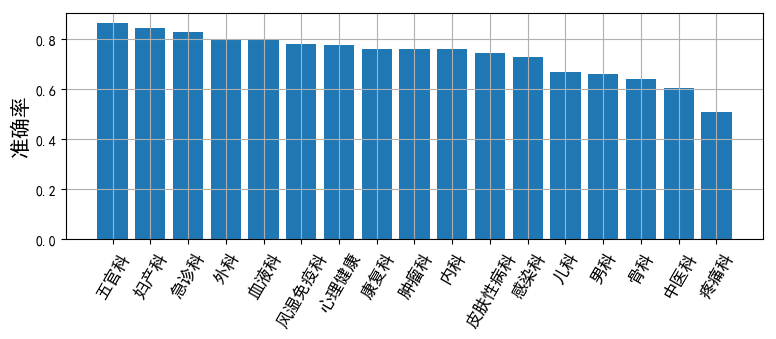

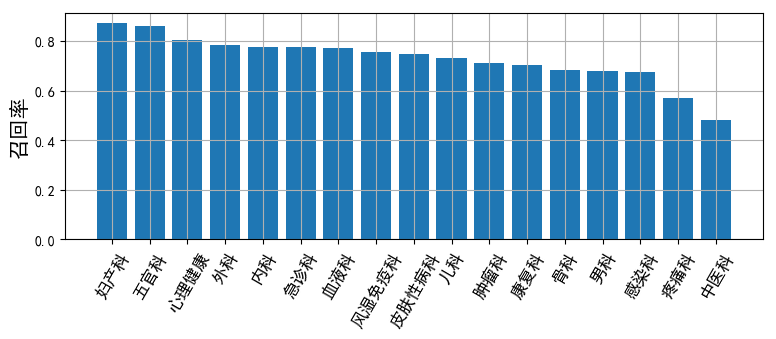

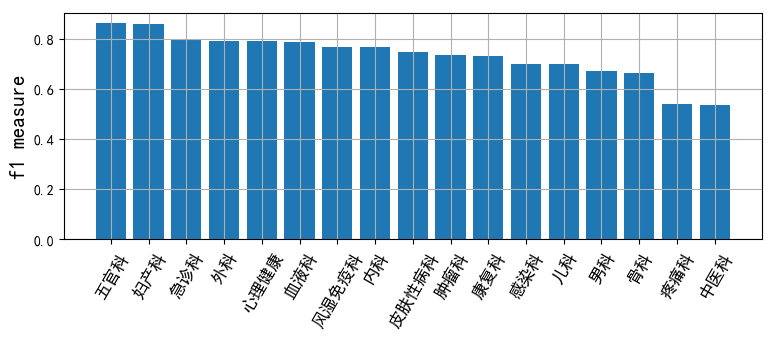

In [26]:
## 绘图   
precision_dict = dict(zip(depart_name, precision))
precision_list = sorted(precision_dict.items(), key=lambda item:item[1], reverse=True)
recall_dict = dict(zip(depart_name, recall))
recall_list = sorted(recall_dict.items(), key=lambda item:item[1], reverse=True)
f1_dict = dict(zip(depart_name, f1_measure))
f1_list = sorted(f1_dict.items(), key=lambda item:item[1], reverse=True)
draw_bar([i[0] for i in precision_list], [i[1] for i in precision_list], u'准确率')
draw_bar([i[0] for i in recall_list], [i[1] for i in recall_list], u'召回率')
draw_bar([i[0] for i in f1_list], [i[1] for i in f1_list], 'f1 measure')

# 4.预测

In [27]:
# coding:utf-8
import numpy
import jieba
import jieba.analyse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cPickle as pkl
import re
import os
import tqdm
import codecs
import fasttext
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
print "done"

done


## 4.1 数据预处理

In [28]:
# # 统计科室数据量 过滤样本不足的科室

# WORDS_COUNT = 1000
# depart_count = dict()

# with codecs.open('../data/search_appointments_split.txt', 'rb', 'utf-8') as f:
#     contents = f.readlines()
#     for line in contents:
#         line_s = line.split('\t')
#         department = line_s[0].encode('utf-8')
        
#         if not depart_count.has_key(department):
#             depart_count[department] = 1
#         else:
#             depart_count[department] += 1

# depart_count = sorted(depart_count.items(), key=lambda item:item[1], reverse=True)
# print "总科室数：", len(depart_count)
# for (depart, count) in depart_count:
#     print depart, count
    
# print '数据超过%d的科室数：%d' %(WORDS_COUNT, len([count for (depart, count) in depart_count if count > WORDS_COUNT]))

# select_department = [depart for (depart, count) in depart_count if count > WORDS_COUNT]
# # black_list = ['特诊部','未定义','其他']
# # white_list = ['心血管内科', '感染内科', '过敏反应科', '普通内科', '呼吸内科', '肝胆内科', '血液内科', '泌尿内科',
# #              '风湿免疫科', '消化内科', '神经内科', '内分泌科', '肾内科']
# # select_department = list(set(select_department)-set(black_list))
# # select_department = list(set(select_department)&set(white_list))
# select_department_zip = zip(select_department, range(len(select_department)))

# with codecs.open('../data/department_freq_select.txt', 'wb','utf-8') as f:
#     for (d, i) in select_department_zip:
#         f.write(('{}\t{}\n'.format(d, i)).decode('utf-8'))

# select_department_dict = dict(select_department_zip)
# pkl.dump(select_department_dict, open('../data/department_freq_select.pkl', 'wb'))
# print "有效科室数：", len(select_department_dict)
# for i in select_department_dict:
#      print i

# print "done"

In [29]:
# # label加载，筛选低于一定数据量的科室
# select_department_dict = pkl.load(open('../data/department_freq_select.pkl', 'rb'))

# des_list = list()

# with codecs.open('../data/search_appointments_split.txt', 'rb', 'utf-8') as f:
#     contents = f.readlines()
#     for line in contents:
#         line_s = line.split('\t')
#         department = line_s[0].encode('utf-8')
        
#         if select_department_dict.has_key(department):
#             des_list.append((department, u''.join(line_s[1:])))

# # 存储
# with codecs.open('../data/final_test.txt', 'w', 'utf-8') as f:
#     for (label, des) in des_list:
#         f.write(u'{}\t{}'.format(label.decode('utf-8'), des))
# print "done"

## 4.2 测试

In [30]:
#加载一级科目训练集词汇
train_dictionary_first = list()
with codecs.open('../data/word_dictionary.txt', 'rb', 'utf-8') as f:
    cont = f.readlines()
    for line in cont:
        train_dictionary_first.append(line.strip())
train_dictionary_first = dict(zip(train_dictionary_first, range(len(train_dictionary_first))))

#加载一级科目对应关系
select_department_dict_first = pkl.load(open('../data/department.pkl', 'rb'))
select_de_tup_first = select_department_dict_first.items()
new_dict_first = dict(zip([str(x[1]) for x in select_de_tup_first], [x[0] for x in select_de_tup_first]))


#加载二级科目训练集词汇
train_dictionary_second = dict()
new_dict_second = dict()
with codecs.open('../data/department_seg.txt', 'rb') as f:
    contents = f.readlines()
    for line in contents:
        line_s = line.split('：')
        deName = line_s[2].strip()
        train_dictionary_second[deName] = list()
        new_dict_second[deName] = dict()
        
        #加载二级科目对应关系
        with codecs.open('../data/depart_data/word_dictionary_{}.txt'.format(deName), 'rb', 'utf-8') as f:
            cont = f.readlines()
            for line in cont:
                train_dictionary_second[deName].append(line.strip())
        train_dictionary_second[deName] = dict(zip(train_dictionary_second[deName], range(len(train_dictionary_second[deName]))))
        
        select_department_dict_second = pkl.load(open('../data/depart/department_{}.pkl'.format(deName), 'rb'))
        select_de_tup_second = select_department_dict_second.items()
        new_dict_second[deName] = dict(zip([str(x[1]) for x in select_de_tup_second], [x[0] for x in select_de_tup_second]))

print 'done' 

done


In [31]:
# 二层模型
def first_part_decide(model, sentence, prothresh = 0.05):    
    words = [i.strip() for i in sentence.split(' ')]
    words = [i for i in words if train_dictionary_first.has_key(i)]
    words = ' '.join(words)
    if len(words) != 0:
        result = model.predict_proba([words], 5)[0]
        return [(new_dict_first.get(i[0].replace("__label__","")), i[1], i[0]) for i in result if i[1]>prothresh]
    else:
#         print('未出现字典中的关键词,无法判定')
        return None

def second_part_decide(model, sentence, deName, prothresh = 0.05):
    words = [i.strip() for i in sentence.split(' ')]
    words = [i for i in words if train_dictionary_second[deName].has_key(i)]
    words = ' '.join(words)
    if len(words) != 0:
        result = model.predict_proba([words], 5)[0]
        return [(new_dict_second[deName].get(i[0].replace("__label__","")), i[1], i[0]) for i in result if i[1]>prothresh]
    else:
#         print('未出现字典中的关键词,无法判定')
        return None

In [32]:
# 模型加载
first_departPath = '../data/model/app_model.bin'

first_departModel = fasttext.load_model(first_departPath)

second_departModel_dict = dict()
with codecs.open('../data/department_seg.txt', 'rb') as f:
    contents = f.readlines()
modelList = dict()
for line in contents:
    line_s = line.split('：')
    fdepart = line_s[0]
    sdepart_list = line_s[1].split('，')
    if len(sdepart_list) == 1:
        continue
    select_department = [i.strip() for i in sdepart_list]
    fdepart_name = line_s[2].strip()
    modelList[fdepart] = fdepart_name
    secondmodel = fasttext.load_model('../data/model/app_model_{}.bin'.format(fdepart_name))
    second_departModel_dict[fdepart] = secondmodel

print "done"

done


In [33]:
# 加载数据
des_list = list()
label_list = list()
# # 过滤后的科室
# with codecs.open('../data/final_test.txt', 'rb', 'utf-8') as f:
# 未过滤的科室
with codecs.open('../data/search_appointments_split_test_final.txt', 'rb', 'utf-8') as f:
    contents = f.readlines()
    for line in contents:
        line_s = line.split('\t')
        label = line_s[0].encode('utf-8')
        des = line_s[1]
        label_list.append(label)
        des_list.append(des)
print 'done'

done


In [34]:
labels_right = list()
texts = list()
labels_predict = list()

for des_index in tqdm.tqdm(range(len(des_list))):
    des = des_list[des_index]
    first_result = first_part_decide(first_departModel, des)
    if first_result == None:
        continue
    optim_depart = ''
    optim_pro = 0.0
    for (fdepart, fpro, fkey) in first_result:
        if second_departModel_dict.has_key(fdepart):
            second_result = second_part_decide(second_departModel_dict[fdepart], des, modelList[fdepart])
            if second_result == None:
                continue
            for (sdepart, spro, skey) in second_result:
                pro = spro
                if pro > optim_pro:
                    optim_depart = sdepart
                    optim_pro = pro
        else:
            if fpro > optim_pro:
                optim_depart = fdepart
                optim_pro = fpro
            
#     print(optim_fdepart)
    if optim_depart!= '':
        labels_predict.append(optim_depart)
        texts.append(des)
        labels_right.append(label_list[des_index])

# for index in range(len(test_data_data)):
#     print('描述：{}'.format(test_data_data[index]))
#     print('科室：{}'.format(res_list[index]))
#     print('\n')

100%|██████████| 48739/48739 [00:11<00:00, 4120.68it/s]


In [35]:
# for i in range(100) :
#     print texts[i]
#     print labels_right[i]
#     print labels_predict[i]
#     print('*'*40)

In [37]:
all_label = list()
with open('../data/department_seg.txt') as f:
    content = f.readlines()
    for aline in content:
        sec_depart = aline.split("：")[1].split("，")
        all_label += sec_depart

A = dict.fromkeys(all_label,0)  #预测正确的各个类的数目
B = dict.fromkeys(all_label,0)  #测试数据集中各个类的数目
C = dict.fromkeys(all_label,0)  #预测结果中各个类的数目

for i in range(0,len(labels_right)):
    try:
        B[labels_right[i]] += 1
        C[labels_predict[i]] += 1
        if labels_right[i] == labels_predict[i]:
            A[labels_right[i]] += 1
    except:
        print labels_right[i]
        

#计算准确率，召回率，F值
for key in B:
#     #低频科目筛选
#     if B[key] == 0:
#         continue
    r = float(A[key]) / float(B[key])
    p = float(A[key]) / float(C[key])
    f1 = p * r * 2 / (p + r)
    print " %-16s\t p:%f\t r:%f\t f:%f\t" % (key, p, r, f1)

        

 眼科          	 p:0.855856	 r:0.898220	 f:0.876526	
 风湿免疫科 	 p:0.843687	 r:0.694147	 f:0.761646	
 心理科       	 p:0.572534	 r:0.694836	 f:0.627784	
 急诊科       	 p:0.905852	 r:0.706349	 f:0.793757	
 性病科       	 p:0.726835	 r:0.752179	 f:0.739290	
 精神科       	 p:0.638056	 r:0.800259	 f:0.710012	
 脊柱外科    	 p:0.662119	 r:0.768156	 f:0.711207	
 妇科          	 p:0.718554	 r:0.829255	 f:0.769946	
 普外科       	 p:0.547222	 r:0.516045	 f:0.531176	
 肿瘤科       	 p:0.834608	 r:0.616525	 f:0.709180	
 骨科          	 p:0.719117	 r:0.579855	 f:0.642021	
 康复科       	 p:0.886228	 r:0.611570	 f:0.723716	
 内分泌科    	 p:0.699201	 r:0.698006	 f:0.698603	
 感染科       	 p:0.865410	 r:0.564530	 f:0.683316	
 乳腺外科    	 p:0.812109	 r:0.847495	 f:0.829424	
 消化内科    	 p:0.580229	 r:0.675751	 f:0.624358	
 疼痛科       	 p:0.552223	 r:0.461938	 f:0.503062	
 血管外科    	 p:0.789281	 r:0.758782	 f:0.773731	
 男科          	 p:0.765053	 r:0.514286	 f:0.615093	
 肾内科       	 p:0.807282	 r:0.763224	 f:0.784635	
 泌尿外科    	 p:0.610414	 r:0

In [38]:
import pandas as pd
df = pd.DataFrame(index = B, columns=['precision','recall','f1-measure'])

for key in B:
    r = float(A[key]) / float(B[key])
    p = float(A[key]) / float(C[key])
    f1 = p * r * 2 / (p + r)
    df.loc[key] = [p, r, f1]

df.to_csv("result_using_cut_for_search_without_sim_replace.csv", encoding = "utf-8")

In [ ]:
df

In [196]:
df_old = pd.read_csv("result_using_cut_for_search.csv")
res = df_new = pd.read_csv("result_using_tfidf.csv")

res['precision'] -= df_old['precision']
res['recall'] -= df_old['recall']
res['f1-measure'] -= df_old['f1-measure']
res

,Unnamed: 0,precision,recall,f1-measure
0,眼科,0.016590,-0.001718,0.008392
1,风湿免疫科,-0.019759,-0.028878,-0.025052
2,心理科,-0.085105,-0.005363,-0.052610
3,急诊科,-0.007277,-0.018831,-0.014827
4,性病科,-0.022014,-0.013665,-0.017971
5,精神科,-0.032797,-0.006477,-0.023603
6,脊柱外科,-0.028276,0.013048,-0.010222
7,妇科,0.019233,0.017592,0.018565
8,胸外科,-0.072381,-0.088496,-0.088975
9,普外科,-0.022277,-0.027156,-0.024675


In [19]:
#加载label与科室对应关系
first = pkl.load(open('../data/department.pkl', 'rb'))
first_dict = dict(zip(first.values(), first.keys()))

In [34]:
my_des = ['肚子 肚子疼 晚上 肚子 肚子疼 伴随 呕吐','一直流鼻涕','胃疼']
my_result = first_departModel.predict(my_des)
for res in my_result:
    print first_dict[int(re.sub("\D", "", res[0].encode('utf-8')))]

儿科
外科
内科


In [103]:
# result = classifier_app.test(input_file)
# print('P@1:', result.precision)
# print('R@1:', result.recall)
# print('Number of examples:', result.nexamples)

In [58]:
# test_result = classifier_app.test('../data/search_appointments_split_test.txt', 1)
# print('P@1:', test_result.precision)
# print('R@1:', test_result.recall)
# print('Number of examples:', test_result.nexamples)

('P@1:', 0.7042519145045149)
('R@1:', 0.7042519145045149)
('Number of examples:', 17498)


In [118]:
# labels_right = []
# texts = []
# with open('../data/search_appointments_split_test.txt') as fr:
#     lines = fr.readlines()
# for line in lines:
#     labels_right.append(line.split("\t")[0].rstrip().replace("__label__",""))
#     texts.append(line.split("\t")[1].decode("utf-8"))
# #     print labels
# #     print texts
# #     break
# labels_predict = [e[0] for e in classifier_app.predict(texts)] #预测输出结果为二维形式
# # print labels_predict

# text_labels = list(set(labels_right))
# text_predict_labels = list(set(labels_predict))
# # print text_predict_labels
# # print text_labels

# A = dict.fromkeys(text_labels,0)  #预测正确的各个类的数目
# B = dict.fromkeys(text_labels,0)   #测试数据集中各个类的数目
# C = dict.fromkeys(text_labels,0) #预测结果中各个类的数目
# for i in range(0,len(labels_right)):
#     B[labels_right[i]] += 1
#     C[labels_predict[i]] += 1
#     if labels_right[i] == labels_predict[i]:
#         A[labels_right[i]] += 1

# # print A 
# # print B
# # print C
# select_department_dict = pkl.load(open('../data/department.pkl', 'rb'))
# select_de_tup = select_department_dict.items()
# new_dict = dict(zip([str(x[1]) for x in select_de_tup], [x[0] for x in select_de_tup]))

# #计算准确率，召回率，F值
# for key in B:
#     r = float(A[key]) / float(B[key])
#     p = float(A[key]) / float(C[key])
#     f1 = p * r * 2 / (p + r)
#     print "%s:%s\tp:%f\tr:%f\tf:%f\t" % (key,new_dict.get(key),r,p,f1)

        

{'24': 23, '25': 95, '26': 67, '27': 24, '20': 21, '21': 394, '22': 41, '23': 338, '28': 450, '29': 57, '1': 66, '0': 701, '3': 22, '2': 91, '5': 32, '4': 1528, '7': 86, '6': 329, '9': 36, '8': 647, '11': 182, '10': 108, '13': 138, '12': 983, '15': 36, '14': 52, '17': 401, '16': 59, '33': 577, '32': 156, '31': 43, '30': 889, '35': 61, '34': 43, '19': 31, '18': 551}
{'24': 178, '25': 170, '26': 278, '27': 353, '20': 258, '21': 720, '22': 414, '23': 416, '28': 769, '29': 224, '1': 167, '0': 777, '3': 153, '2': 635, '5': 129, '4': 1930, '7': 326, '6': 904, '9': 135, '8': 850, '11': 356, '10': 291, '13': 298, '12': 1263, '15': 430, '14': 137, '17': 545, '16': 135, '33': 767, '32': 456, '31': 141, '30': 1137, '35': 471, '34': 123, '19': 137, '18': 844}
{u'24': 88, u'25': 198, u'26': 226, u'27': 178, u'20': 110, u'21': 793, u'22': 170, u'23': 388, u'28': 979, u'29': 155, u'1': 147, u'0': 846, u'3': 122, u'2': 370, u'5': 138, u'4': 2304, u'7': 285, u'6': 902, u'9': 111, u'8': 1030, u'11': 424

In [126]:
dimlist = [20, 50, 100]
word_ngramslist = [5, 10]
lrlist = [0.1, 0.3, 0.5]
# set params
input_file = '../data/search_appointments_split_train.txt'
output = 'app_model'
# dim=20
# lr=0.5
loss= 'hs'
lr_update_rate = 98
epoch=200
ws = 5
min_count=2
neg = 2
# word_ngrams= 5
bucket=2000000
thread=5
silent=1
label_prefix='__label__'
for dim in dimlist:
    for word_ngrams in word_ngramslist:
        for lr in lrlist:
            print('dim:', dim)
            print('word_ngrams:', word_ngrams)
            print('lr:', lr)
            # Train the classifier
            classifier_app = fasttext.supervised(input_file, output, dim=dim, lr=lr, epoch=epoch,
                                                 min_count=min_count, word_ngrams=word_ngrams, bucket=bucket,
                                                 thread=thread, silent=silent, label_prefix=label_prefix, ws=ws)
            result = classifier_app.test(input_file)
            print('P@1:', result.precision)
            print('R@1:', result.recall)
            print('Number of examples:', result.nexamples)
            
            test_result = classifier_app.test('../data/search_appointments_split_test.txt')
            print('P@1:', test_result.precision)
            print('R@1:', test_result.recall)
            print('Number of examples:', test_result.nexamples)
            print('-'*20)
            print('\n')

('dim:', 20)
('word_ngrams:', 5)
('lr:', 0.1)
('P@1:', 0.9811160837544385)
('R@1:', 0.9811160837544385)
('Number of examples:', 155741)
('P@1:', 0.56568689726858)
('R@1:', 0.56568689726858)
('Number of examples:', 17317)
--------------------


('dim:', 20)
('word_ngrams:', 5)
('lr:', 0.3)
('P@1:', 0.981032611836318)
('R@1:', 0.981032611836318)
('Number of examples:', 155741)
('P@1:', 0.5681700063521395)
('R@1:', 0.5681700063521395)
('Number of examples:', 17317)
--------------------


('dim:', 20)
('word_ngrams:', 5)
('lr:', 0.5)
('P@1:', 0.981250923006787)
('R@1:', 0.981250923006787)
('Number of examples:', 155741)
('P@1:', 0.5700179014840908)
('R@1:', 0.5700179014840908)
('Number of examples:', 17317)
--------------------


('dim:', 20)
('word_ngrams:', 5)
('lr:', 0.1)
('P@1:', 0.9811610301718879)
('R@1:', 0.9811610301718879)
('Number of examples:', 155741)
('P@1:', 0.5670728186175434)
('R@1:', 0.5670728186175434)
('Number of examples:', 17317)
--------------------


('dim:', 20)
('w

KeyboardInterrupt: 

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
with open('../data/search_appointments_split.txt', 'rb') as f:
    contents = f.read()
countv = CountVectorizer()

In [49]:
new_countv = countv.fit_transform([contents])

In [50]:
print(new_countv.shape)
# print(countv.get_feature_names())
# with codecs.open('../data/search_words_fre.txt', 'wb', 'utf-8') as f:
#     for key in countv.vocabulary_.keys(): 
#         f.write(u'{}\t{}\n'.format(key, new_countv[0, countv.vocabulary_[key]]))

(1, 59409)


In [19]:
depart_count = dict()
with codecs.open('../data/search_appointments_split.txt', 'rb', 'utf-8') as f:
    contents = f.readlines()
    for line in contents:
        line_s = line.split('\t')
        department = line_s[0].encode('utf-8')
        if department=="心":
            print line_s[1].encode('utf-8')
        if not depart_count.has_key(department):
            depart_count[department] = 1
        else:
            depart_count[department] += 1

depart_count = sorted(depart_count.items(), key=lambda item:item[1], reverse=True)
# print "总科室数：", len(depart_count)
# for (depart, count) in depart_count:
#     print depart, count
seta = set()
setb = set()
for (depart, count) in depart_count:
    seta.add(depart)
with open('../data/department_seg.txt', 'rb') as f:
    content = f.readlines()
    for aline in content:
        for depart in aline.split("：")[1].split("，"):
            setb.add(depart)

for item in setb-seta:
    print item

In [2]:
# 使用word2vec模型，过滤相似词
sim_dict = dict()
with open("../word2vec/sim_dict.txt", "rb") as f:
    contents = f.readlines()
    for aline in contents:
        word = aline.split("\t")[0]
        sim_list = [aword for aword in aline.split("\t")[1].split(" ")]
        sim_dict[word] = set(sim_list)

7517


In [ ]:
with codecs.open('../data/search_appointments_split.txt', 'rb', 'utf-8') as f:
    contents = f.readlines()
    for line in contents:
        line_s = line.split('\t')
        department =3 line_s[0].encode('utf-8')
        des = line_s[1].split(" ")
        
        for word in des:
            if sim_dict.has_key(word):
                
        if department in select_department:
            if not select_depart_dict.has_key(department):
                select_depart_dict[department] = len(select_depart_dict.keys())
            des_list.append(('__label__{}'.format(select_depart_dict[department]), u''.join(line_s[1:])))